In [1]:
import pandas as pd
from matplotlib.ticker import FuncFormatter
from Cohort import CohortTable
import numpy as np
import altair as alt
import math

In [70]:
myTable = CohortTable(forecast_period=10, n_years=3, hires_per_year=[1,2,2,3,4,6], \
                      revenue_goal=1000000, annual_attrition=.16, first_year_full_hire=True, attrition_y0=False)

myTable.print_all_tables()

## Productivity Table

The following table contains the percentage of productivity for each cohort by year.

The maximum percentage for each cell is 100% or 1. Any value less than 1 is used to discount the         productivity of that cohort class for that particular year.


,0,1,2,3,4,5,6,7,8,9
Cohort,,,,,,,,,,
0,0.33,0.67,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,0.00,0.33,0.67,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,0.00,0.00,0.33,0.67,1.00,1.00,1.00,1.00,1.00,1.00
3,0.00,0.00,0.00,0.33,0.67,1.00,1.00,1.00,1.00,1.00
4,0.00,0.00,0.00,0.00,0.33,0.67,1.00,1.00,1.00,1.00
5,0.00,0.00,0.00,0.00,0.00,0.33,0.67,1.00,1.00,1.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.67,1.00,1.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.67,1.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.67


## Employee Count before Attrition

This table for each year, by each cohort, if no attrition were to occur.


,0,1,2,3,4,5,6,7,8,9
Cohort,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1
1,0,2,2,2,2,2,2,2,2,2
2,0,0,2,2,2,2,2,2,2,2
3,0,0,0,3,3,3,3,3,3,3
4,0,0,0,0,4,4,4,4,4,4
5,0,0,0,0,0,6,6,6,6,6
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0


## Attrition Mask Table

This table represents the *percentage* of the cohort **population** that has left. The number for each cohort starts        at 1 (or 100%) and decreases over time. If the argument *attrition_y0* is **TRUE**, the first year of the cohort        is reduced by the annual attrition rate. Otherwise, attrition starts in the second year of each cohort.


,0,1,2,3,4,5,6,7,8,9
Cohort,,,,,,,,,,
0,1.00,0.84,0.71,0.59,0.50,0.42,0.35,0.30,0.25,0.21
1,1.00,1.00,0.84,0.71,0.59,0.50,0.42,0.35,0.30,0.25
2,1.00,1.00,1.00,0.84,0.71,0.59,0.50,0.42,0.35,0.30
3,1.00,1.00,1.00,1.00,0.84,0.71,0.59,0.50,0.42,0.35
4,1.00,1.00,1.00,1.00,1.00,0.84,0.71,0.59,0.50,0.42
5,1.00,1.00,1.00,1.00,1.00,1.00,0.84,0.71,0.59,0.50
6,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.84,0.71,0.59
7,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.84,0.71
8,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.84


## Retained Employees after Attrition

This table contains the number of employees that remain with the company after accounting for attrition. This         table contains only whole employees, not fractions, to illustrate when each person is expected to leave as opposed         to the Full Time Equivalent (FTE) table below.


,0,1,2,3,4,5,6,7,8,9
Cohort,,,,,,,,,,
0,1,1,1,1,0,0,0,0,0,0
1,0,2,2,1,1,1,1,1,1,0
2,0,0,2,2,1,1,1,1,1,1
3,0,0,0,3,3,2,2,1,1,1
4,0,0,0,0,4,3,3,2,2,2
5,0,0,0,0,0,6,5,4,4,3
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0


## Full Time Equivalent Table

This table takes the retained employees after attrition from the table above and calculates the         number of FTE after applying mid-year hiring. We assume that hiring takes place throughout the year rather than have         all employees hired on the first of the year. This results in a lower FTE figure for the first year of the cohort.


,0,1,2,3,4,5,6,7,8,9
Cohort,,,,,,,,,,
0,1.00,0.84,0.71,0.59,0.50,0.42,0.35,0.30,0.25,0.21
1,0.00,1.00,1.68,1.41,1.19,1.00,0.84,0.70,0.59,0.50
2,0.00,0.00,1.00,1.68,1.41,1.19,1.00,0.84,0.70,0.59
3,0.00,0.00,0.00,1.50,2.52,2.12,1.78,1.49,1.25,1.05
4,0.00,0.00,0.00,0.00,2.00,3.36,2.82,2.37,1.99,1.67
5,0.00,0.00,0.00,0.00,0.00,3.00,5.04,4.23,3.56,2.99
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Full Time Equivalent after Factoring Productivity Ramp Up

This table takes the FTE figures from the table above and applies the ramp up in productivity.


,0,1,2,3,4,5,6,7,8,9
Cohort,,,,,,,,,,
0,0.33,0.56,0.71,0.59,0.50,0.42,0.35,0.30,0.25,0.21
1,0.00,0.33,1.12,1.41,1.19,1.00,0.84,0.70,0.59,0.50
2,0.00,0.00,0.33,1.12,1.41,1.19,1.00,0.84,0.70,0.59
3,0.00,0.00,0.00,0.50,1.68,2.12,1.78,1.49,1.25,1.05
4,0.00,0.00,0.00,0.00,0.67,2.24,2.82,2.37,1.99,1.67
5,0.00,0.00,0.00,0.00,0.00,1.00,3.36,4.23,3.56,2.99
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Revenue Table

This table takes the final FTE figures, after factoring for productivity ramp up periods, and calculates         the total revenue per year and per cohort.


,0,1,2,3,4,5,6,7,8,9
Cohort,,,,,,,,,,
0,"333,333","560,000","705,600","592,704","497,871","418,212","351,298","295,090","247,876","208,216"
1,0,"333,333","1,120,000","1,411,200","1,185,408","995,743","836,424","702,596","590,181","495,752"
2,0,0,"333,333","1,120,000","1,411,200","1,185,408","995,743","836,424","702,596","590,181"
3,0,0,0,"500,000","1,680,000","2,116,800","1,778,112","1,493,614","1,254,636","1,053,894"
4,0,0,0,0,"666,667","2,240,000","2,822,400","2,370,816","1,991,485","1,672,848"
5,0,0,0,0,0,"1,000,000","3,360,000","4,233,600","3,556,224","2,987,228"
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0


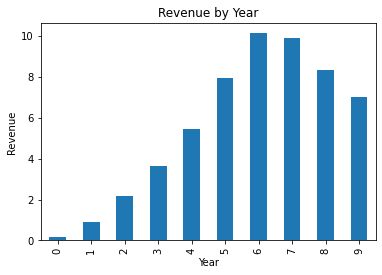

In [3]:
ax = myTable.retained_fte_factored_df.loc['Sum of FTE'].plot(kind='bar', title='Revenue by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue')
ax.yaxis.set_major_formatter(FuncFormatter('{0:,.0f}'.format))

In [27]:
myTable.revenue_df.loc['Sum of Revenue'] = myTable.revenue_df.sum()

In [69]:
revenue_melt = myTable.revenue_df.loc[['Sum of Revenue']].melt(var_name='Year', value_name='Revenue')
chart = alt.Chart(revenue_melt).mark_area().encode(
    x = alt.X('Year', sort=list(revenue_melt.index)),
    y = alt.Y('Revenue'),
    tooltip = ['Year', alt.Tooltip('Revenue', format=',.0f')]
).properties(title='Total Revenue by Year', width=600, height=400).interactive()

display(revenue_melt)
display(chart)

,Year,Revenue
0,Year 1,3.333333e+05
1,Year 2,8.933333e+05
2,Year 3,2.158933e+06
3,Year 4,3.623904e+06
4,Year 5,5.441146e+06
5,Year 6,7.956163e+06
6,Year 7,1.014398e+07
7,Year 8,9.932140e+06
8,Year 9,8.342998e+06
9,Year 10,7.008118e+06


alt.Chart(...)

In [2]:
def size_list(l, length, pad=0):
    if len(l) >= length:
        del l[length:]
    else:
        l.extend([pad] * (length - len(l)))

    return l

In [117]:
n_years = 5
forecast_period = 10
ramp_log = [math.log2(n) for n in np.delete(np.linspace(1,2,n_years+1),0)]
ramp_log_full = size_list(ramp_log, forecast_period, pad=1)

productivity_list = [np.roll(ramp_log_full, i) for i in range(forecast_period)]
productivity_list = np.triu(productivity_list)

In [118]:
pd.DataFrame(productivity_list)

,0,1,2,3,4,5,6,7,8,9
0,0.263034,0.485427,0.678072,0.847997,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.000000,0.263034,0.485427,0.678072,0.847997,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.000000,0.000000,0.263034,0.485427,0.678072,0.847997,1.000000,1.000000,1.000000,1.000000
3,0.000000,0.000000,0.000000,0.263034,0.485427,0.678072,0.847997,1.000000,1.000000,1.000000
4,0.000000,0.000000,0.000000,0.000000,0.263034,0.485427,0.678072,0.847997,1.000000,1.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.263034,0.485427,0.678072,0.847997,1.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263034,0.485427,0.678072,0.847997
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263034,0.485427,0.678072
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263034,0.485427
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263034


In [119]:
ramp_exp = [math.exp(1-(1/n**2)) for n in np.delete(np.linspace(0,1,n_years+1),0)]

<AxesSubplot:>

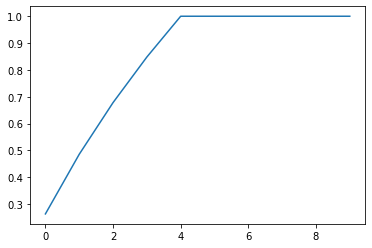

In [121]:
sns.lineplot(data=productivity_list[0])

In [264]:
def sigmoid(x, width, center):
    return 1 / (1 + np.exp(width*(-x - center)))

In [266]:
sigmoid(-10, 0,0)

0.5

<AxesSubplot:>

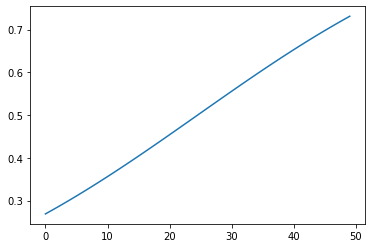

In [268]:
s_curve = [sigmoid(n, .1, 0) for n in np.linspace(-10,10,50)]
sns.lineplot(data=s_curve)

<AxesSubplot:>

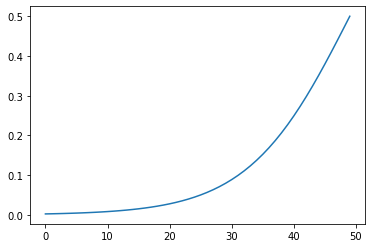

In [262]:
s_curve = [sigmoid(n, .3, -10) for n in np.linspace(-10,10,50)]
sns.lineplot(data=s_curve)

In [246]:
s_curve

[0.14185106490048782, 0.7685247834990175, 0.9852259683067269]